In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import scienceplots as scp

import numpy as np
import torch

matplotlib.rcParams['figure.figsize'] = (20, 6)

from main import main, parse_args

from argparse import Namespace
from utils.plotting import plot_change_responses, plot_trial_responses, plot_omission_responses, plot_sequence_responses
from utils.analysis import process_outputs, get_change_responses, get_omission_responses

import os

import warnings
warnings.filterwarnings('ignore')

from utils.data import load_results_files

SCRATCH = "." #"/storage/ice1/7/2/asharafeldin3/novelty_encoding_model"

In [2]:
import importlib 
import utils.plotting
importlib.reload(utils.plotting)
from utils.plotting import plot_change_responses, plot_trial_responses, plot_omission_responses, plot_sequence_responses, plot_training_progress, plot_dprimes, plot_example_reward_sequence

### Perception only

In [42]:
passive_args, passive_change, passive_omission, passive_progress = load_results_files(f"{SCRATCH}/results/main_model", "no_disinh")
passive_args = Namespace(**passive_args)

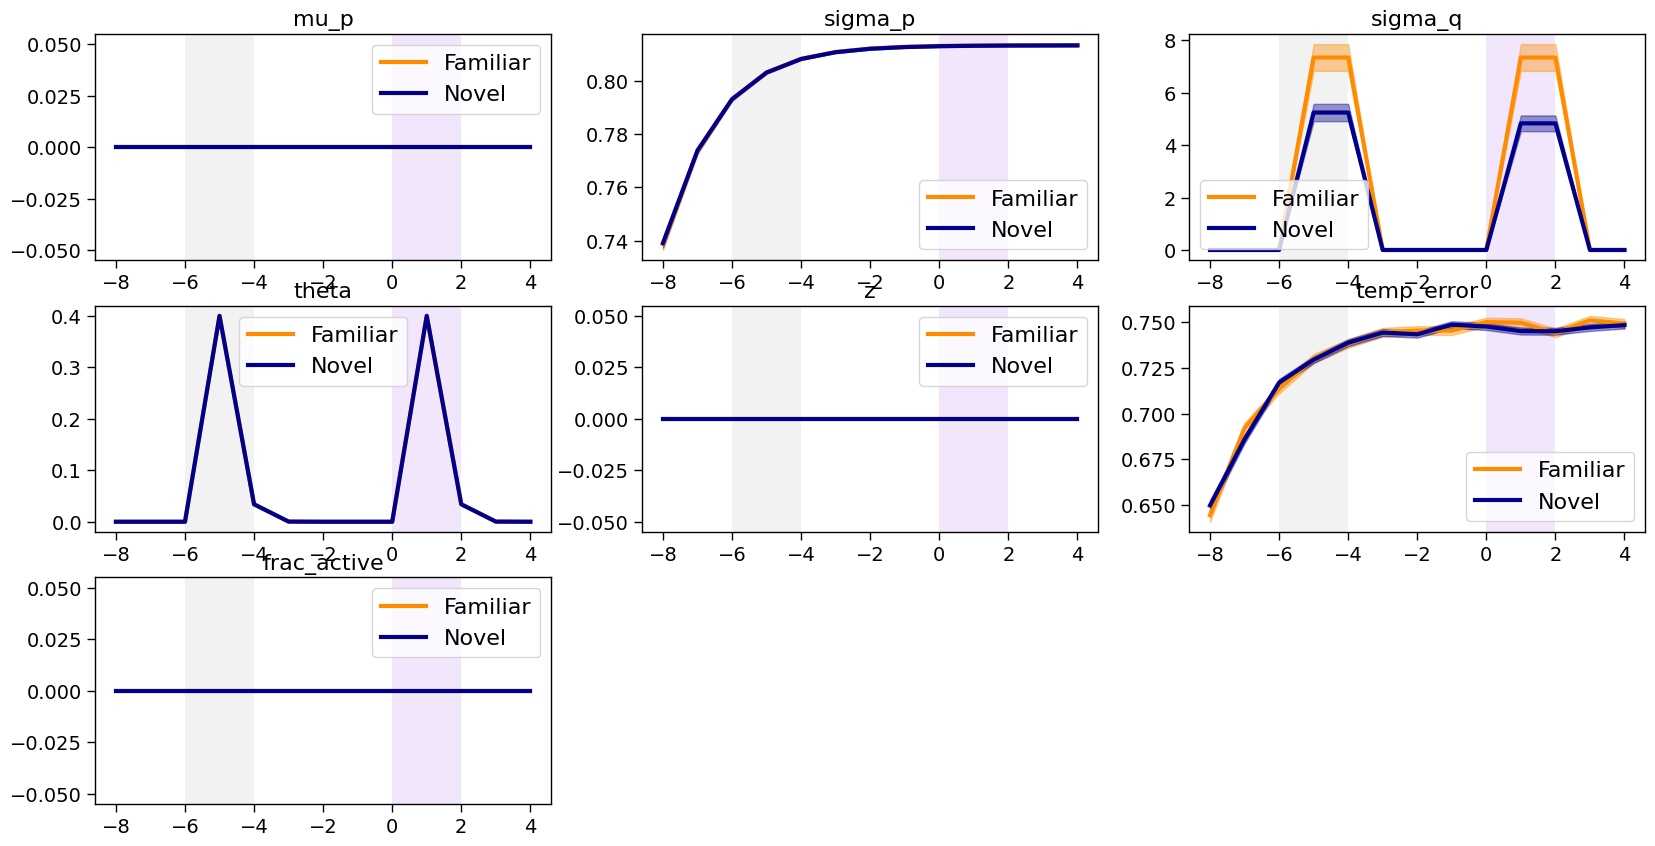

In [43]:
##### plot responses around image change

with plt.style.context(['nature', 'notebook']):
        
    passive_change_fig = plt.figure(figsize=(20, 10))
    plt.tight_layout(pad=10, h_pad=5)

    for i, pop in enumerate(passive_change['familiar'].keys()):
        ax = plt.subplot(3, 3, i+1)
        plot_trial_responses(passive_args, ax, passive_change['familiar'][pop], passive_change['novel'][pop], normalize=False)
        ax.set_title(f"{pop}")
        ax.legend()

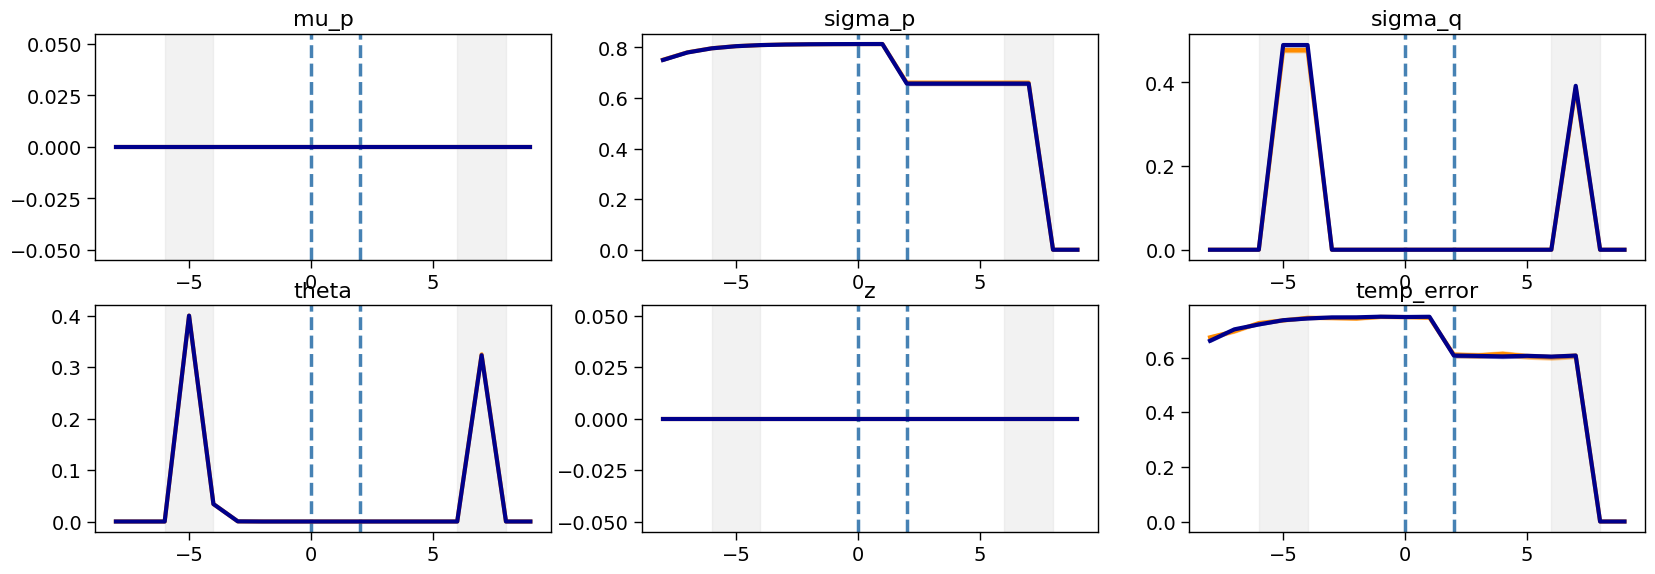

In [44]:
##### plot responses around omissions

with plt.style.context(['nature', 'notebook']):
    
    passive_omission_fig = plt.figure(figsize=(20, 10))
    plt.tight_layout(pad=10, h_pad=5)

    for i, pop in enumerate(passive_omission['familiar'].keys()):
        ax = plt.subplot(3, 3, i+1)
        plot_trial_responses(passive_args, ax, passive_omission['familiar'][pop], passive_omission['novel'][pop], trial_mode='omission', normalize=False)
        _ = ax.set_title(f"{pop}")

### Perception with Action

In [27]:
active_args, active_change, active_omission, active_progress = load_results_files(f"{SCRATCH}/results/main_model", "perception_action")
active_args = Namespace(**active_args)

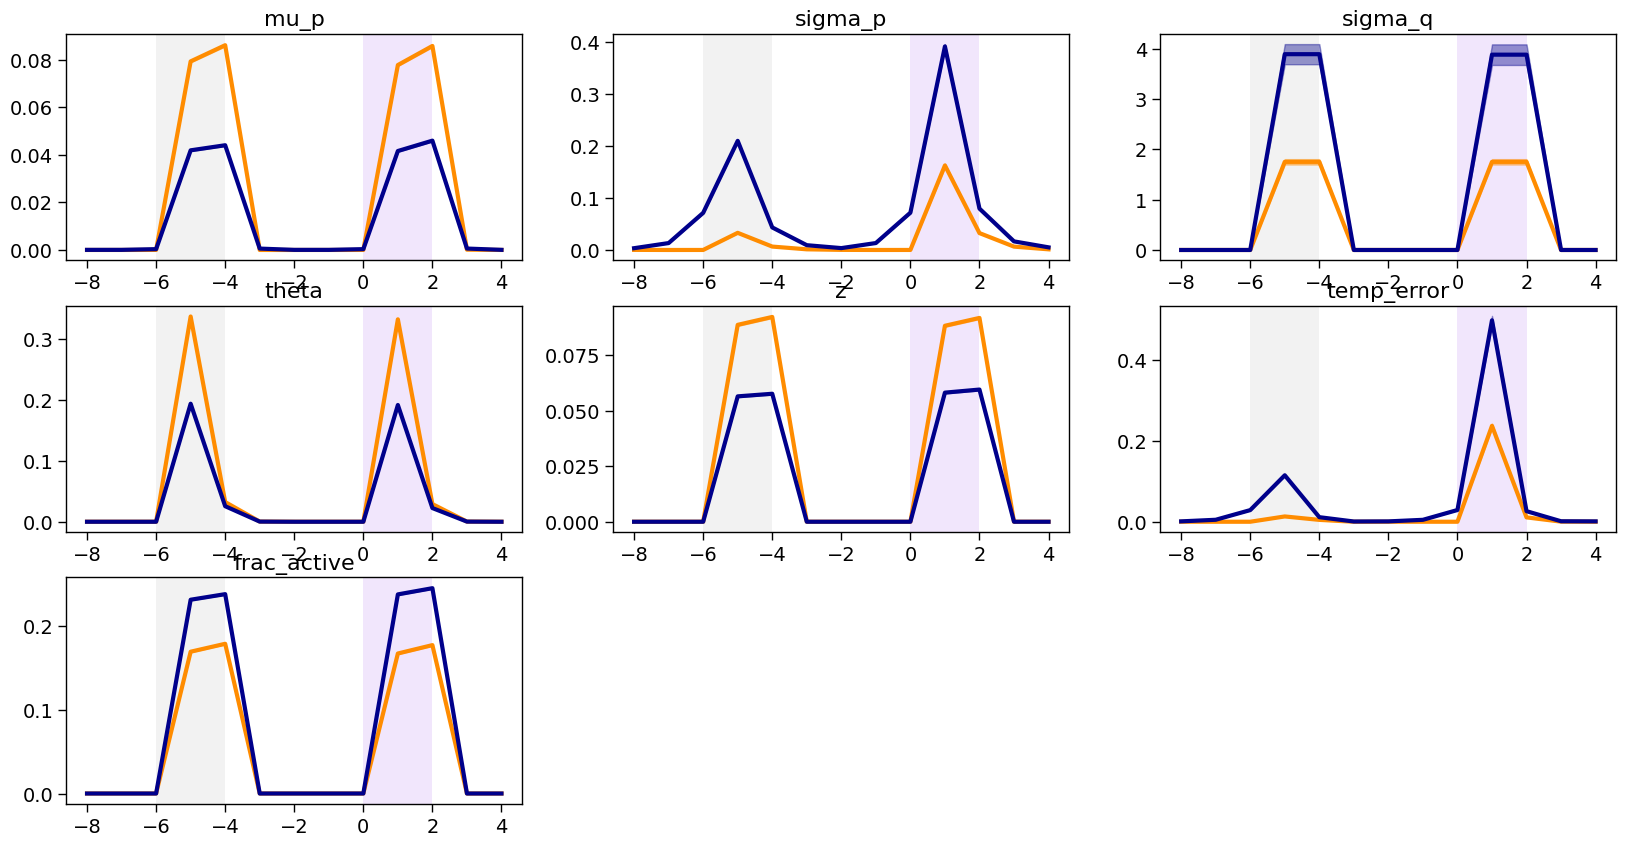

In [28]:
##### plot responses around image change

with plt.style.context(['nature', 'notebook']):
        
    active_change_fig = plt.figure(figsize=(20, 10))
    plt.tight_layout(pad=10, h_pad=5)

    for i, pop in enumerate(active_change['familiar'].keys()):
        ax = plt.subplot(3, 3, i+1)
        plot_trial_responses(active_args, ax, active_change['familiar'][pop], active_change['novel'][pop], normalize=False)
        ax.set_title(f"{pop}")
        #ax.legend()

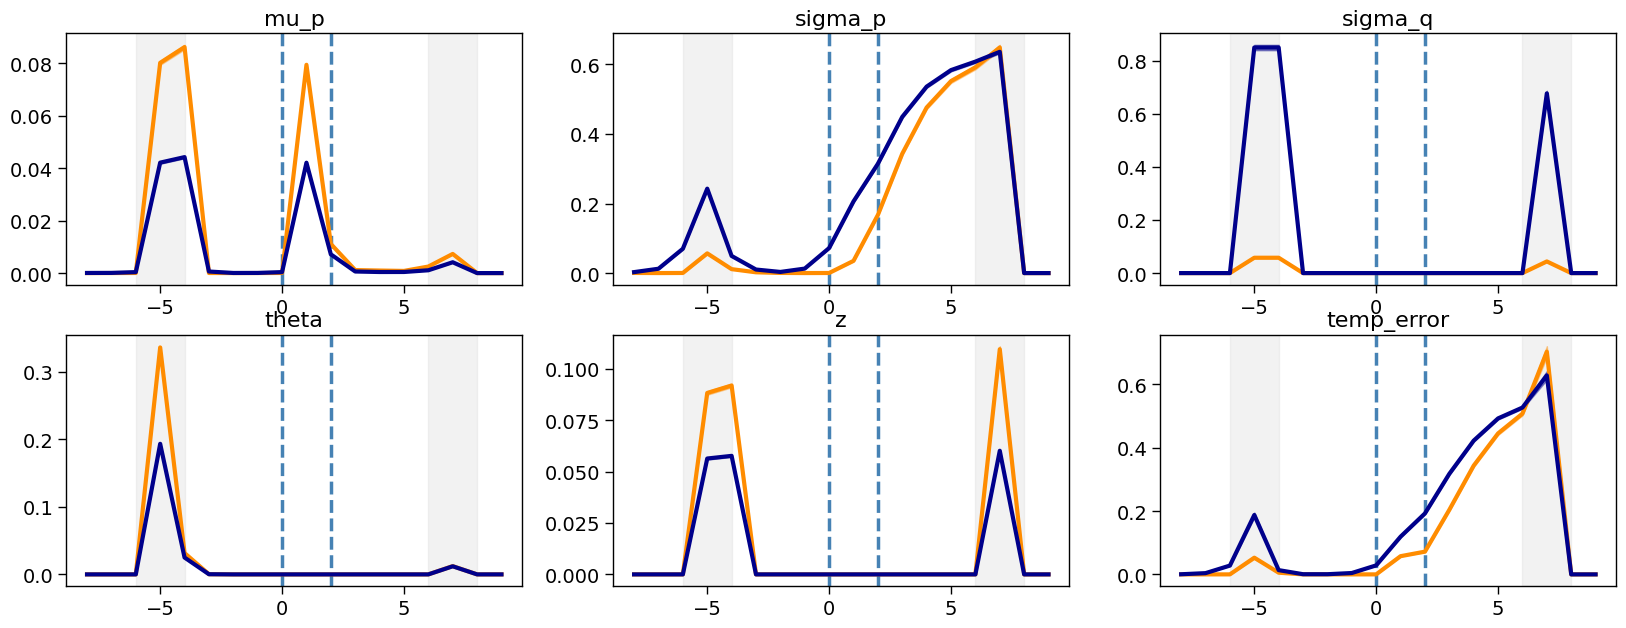

In [29]:
##### plot responses around omissions

with plt.style.context(['nature', 'notebook']):

    active_omission_fig = plt.figure(figsize=(20, 15))
    plt.tight_layout(pad=10, h_pad=5)

    for i, pop in enumerate(active_omission['familiar'].keys()):
        ax = plt.subplot(4, 3, i+1)
        plot_trial_responses(active_args, ax, active_omission['familiar'][pop], active_omission['novel'][pop], trial_mode='omission', normalize=False)
        _ = ax.set_title(f"{pop}")

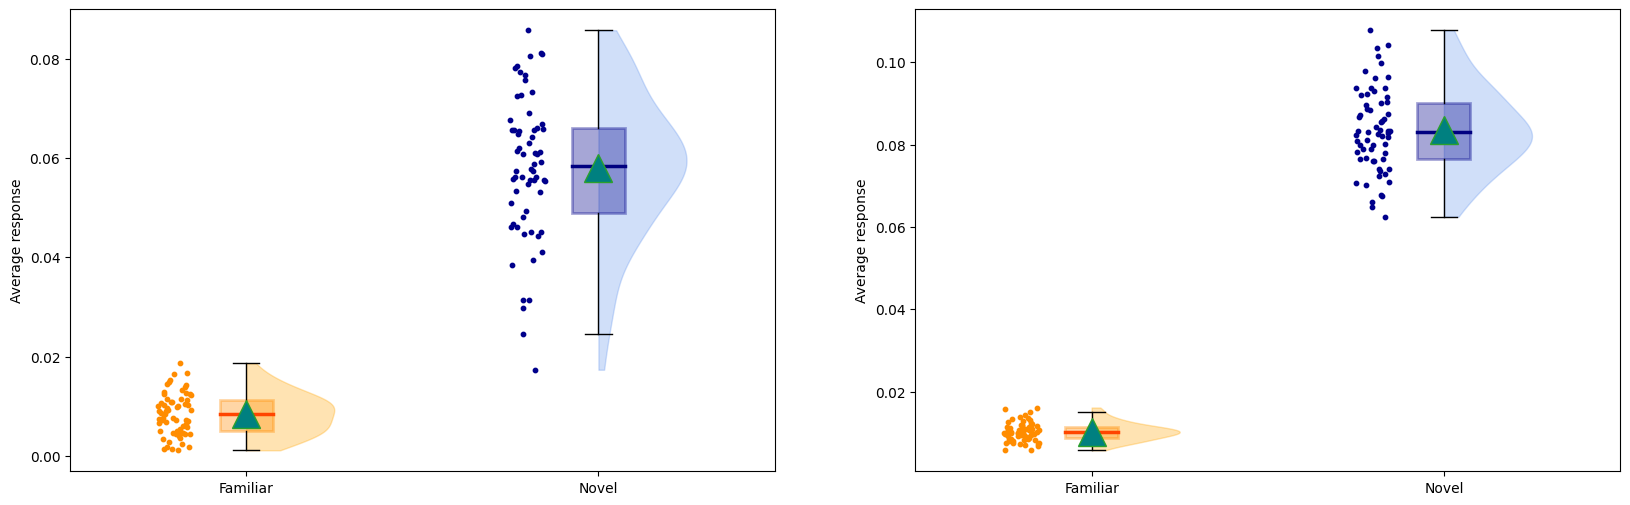

In [30]:
from utils.plotting import raincloud_plot

sq = 3

exp_ax1 = plt.subplot(1, 2, 1)
famt = passive_change['familiar_means']['sigma_p'][..., 0].detach()
novt = passive_change['novel_means']['sigma_p'][..., 0].detach()
nonlin = lambda x: x.mean(0) #torch.relu(x - .95).mean(0) #(1 - 0.1 * x).mean(-1) 
raincloud_plot(exp_ax1, nonlin(famt), nonlin(novt))
#plt.title('SST (theta)')
#plt.ylim([0.04, 0.11])

exp_ax2 = plt.subplot(1, 2, 2)
fams = active_change['familiar_means']['sigma_p'][..., 0].detach()
novs = active_change['novel_means']['sigma_p'][..., 0].detach()
raincloud_plot(exp_ax2, torch.mean(fams, dim=0), torch.mean(novs, dim=0))
#plt.title('VIP (sigma_p)')
#plt.ylim([0.04, 0.11])

### Confidence interval plots

Text(0.5, 1.0, 'VIP (sigma_p)')

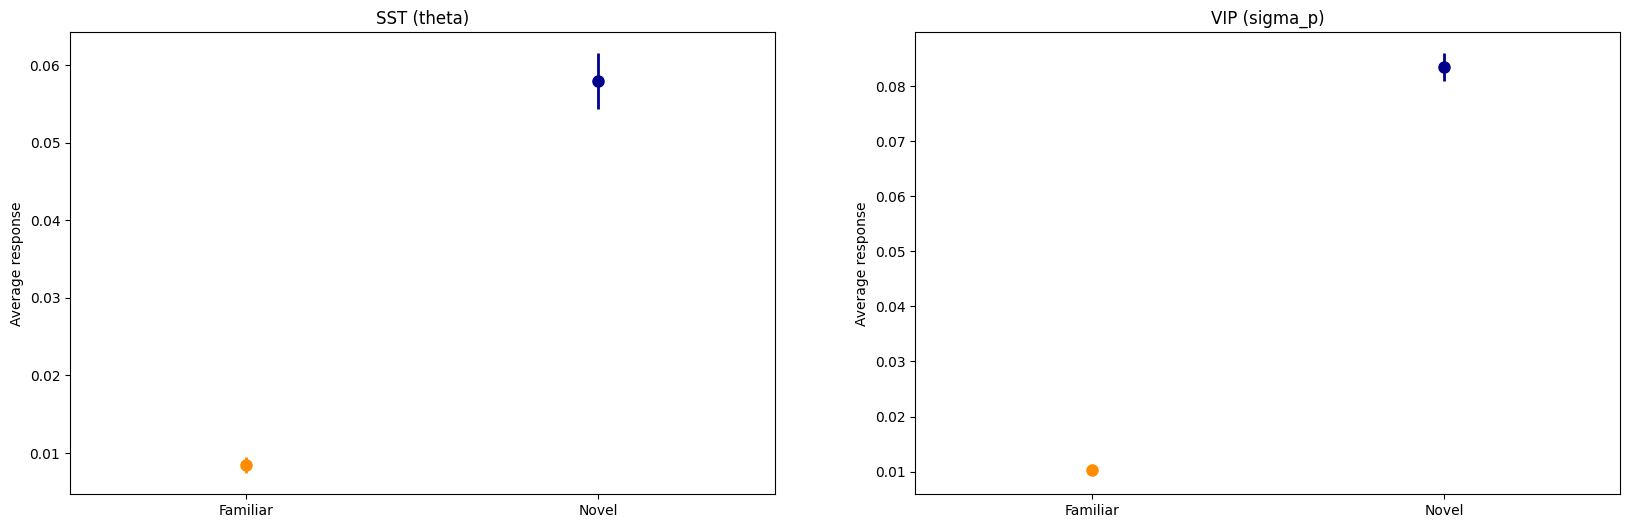

In [31]:
from utils.plotting import plot_confidence_intervals

exp_ax1 = plt.subplot(1, 2, 1)
famt = passive_change['familiar_means']['sigma_p'][..., 0].detach()
novt = passive_change['novel_means']['sigma_p'][..., 0].detach()
nonlin = lambda x: x.mean(0)
plot_confidence_intervals(exp_ax1, nonlin(famt).numpy(), nonlin(novt).numpy(), alpha=0.05)
plt.title('SST (theta)')
#plt.ylim([0., 0.25])

exp_ax2 = plt.subplot(1, 2, 2)
fams = active_change['familiar_means']['sigma_p'][..., 0].detach()
novs = active_change['novel_means']['sigma_p'][..., 0].detach()
plot_confidence_intervals(exp_ax2, fams.mean(0).numpy(), novs.mean(0).numpy(), alpha=0.05)
plt.title('VIP (sigma_p)')
#plt.ylim([0., 0.25])



### Training progress

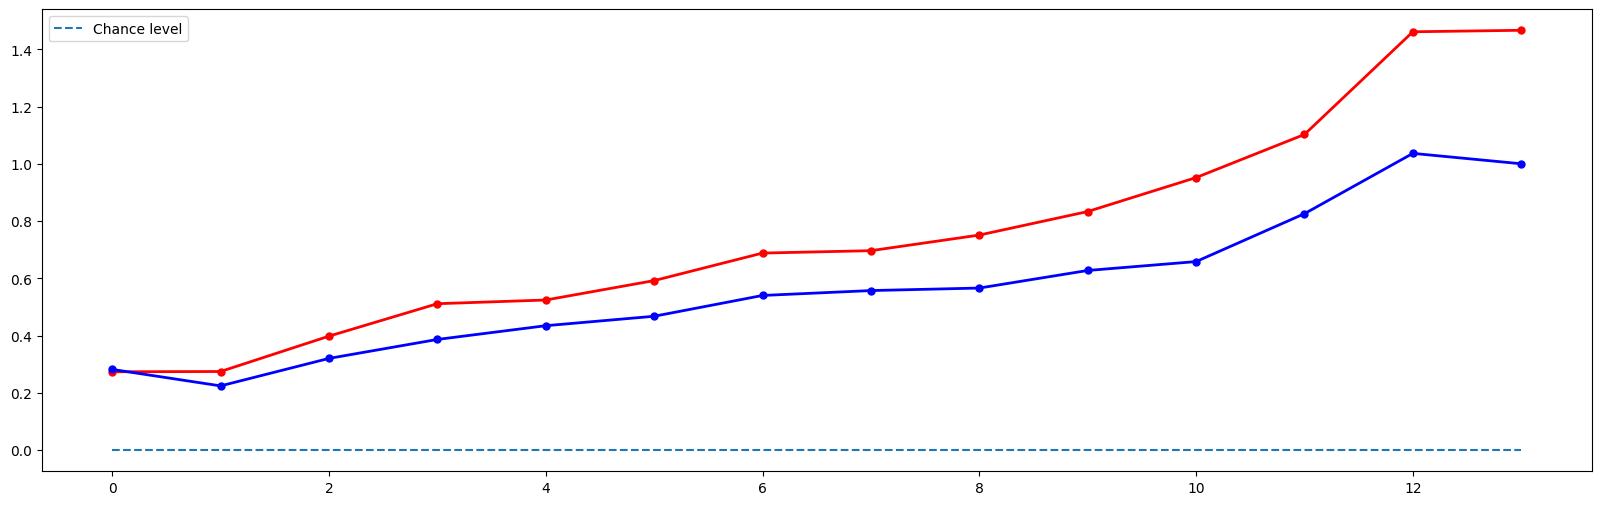

In [32]:
dprime = active_progress['dprime'].mean(0)
dprime_novel = active_progress['dprime_novel'].mean(0)
plt.plot(dprime, '-or', linewidth=2.0, markersize=5)
plt.plot(dprime_novel, '-ob', linewidth=2.0, markersize=5)
plt.plot()
plt.plot(np.arange(len(dprime)), np.zeros_like(dprime), '--', label='Chance level')
plt.legend()

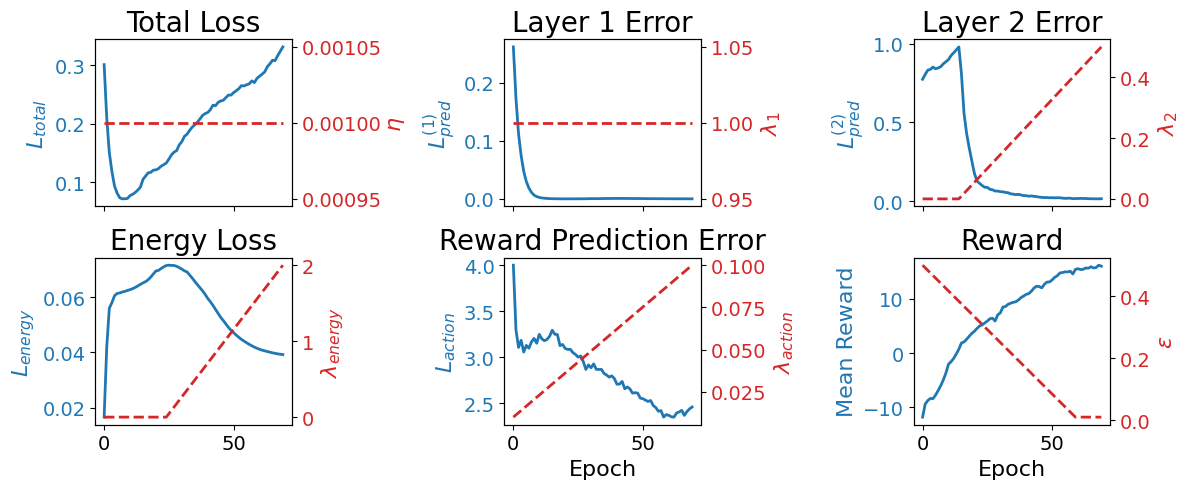

In [33]:
_ = plot_training_progress(passive_args, passive_progress, save_fig=False)

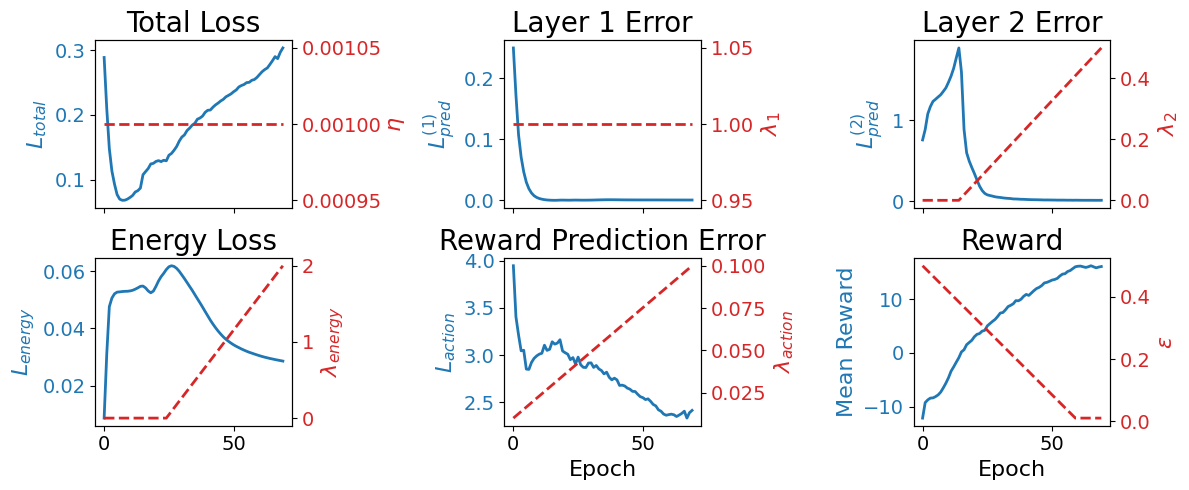

In [34]:
_ = plot_training_progress(active_args, active_progress, save_fig=False)

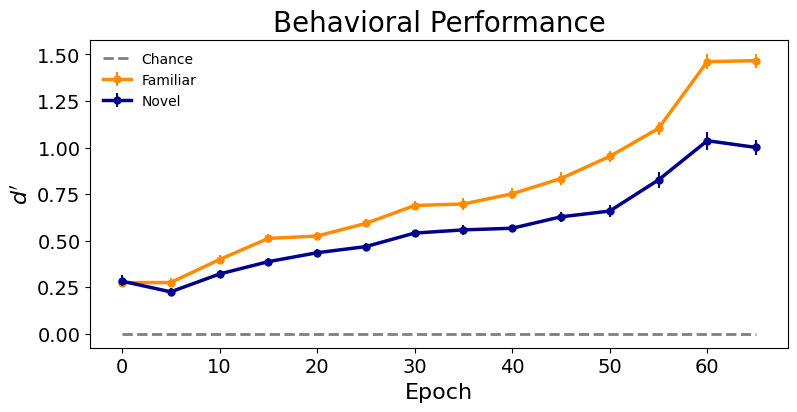

In [35]:
dprimes_fig, dprimes_ax = plt.subplots(1, 1, figsize=(9, 4))
plot_dprimes(dprimes_ax, np.arange(active_args.num_epochs, step=5.),
             active_progress['dprime'],
             active_progress['dprime_novel'],
             title="Behavioral Performance", xlabel='Epoch')

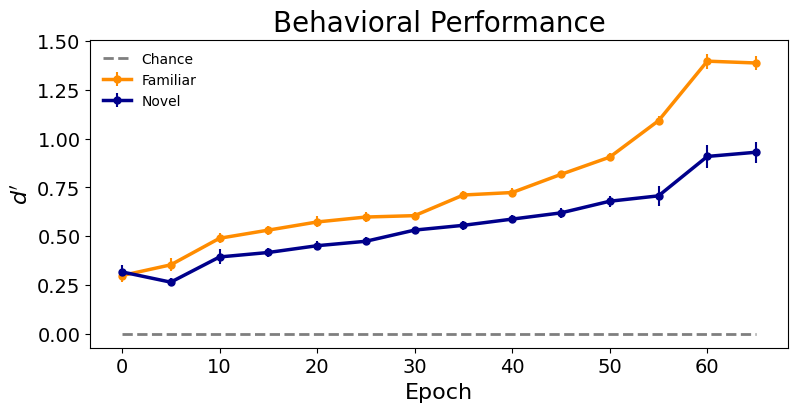

In [36]:
dprimes_fig, dprimes_ax = plt.subplots(1, 1, figsize=(9, 4))
plot_dprimes(dprimes_ax, np.arange(active_args.num_epochs, step=5.),
             passive_progress['dprime'],
             passive_progress['dprime_novel'],
             title="Behavioral Performance", xlabel='Epoch')

In [37]:
passive_progress['dprime'].mean(0)[-1]

1.3882427624004394

In [16]:
passive_progress.keys()

dict_keys(['total', 'spatial_error', 'temporal_error', 'energy', 'value_loss', 'episode_rewards', 'dprime', 'dprime_novel', 'lr'])

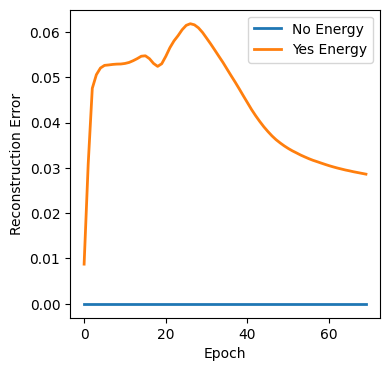

In [46]:
plt.figure(figsize=(4, 4))

plt.plot(passive_progress['energy'].mean(0), linewidth=2., label='No Energy')
plt.plot(active_progress['energy'].mean(0), linewidth=2., label='Yes Energy')
plt.xlabel('Epoch')
plt.ylabel('Reconstruction Error')
plt.legend()

(0.0, 0.5)

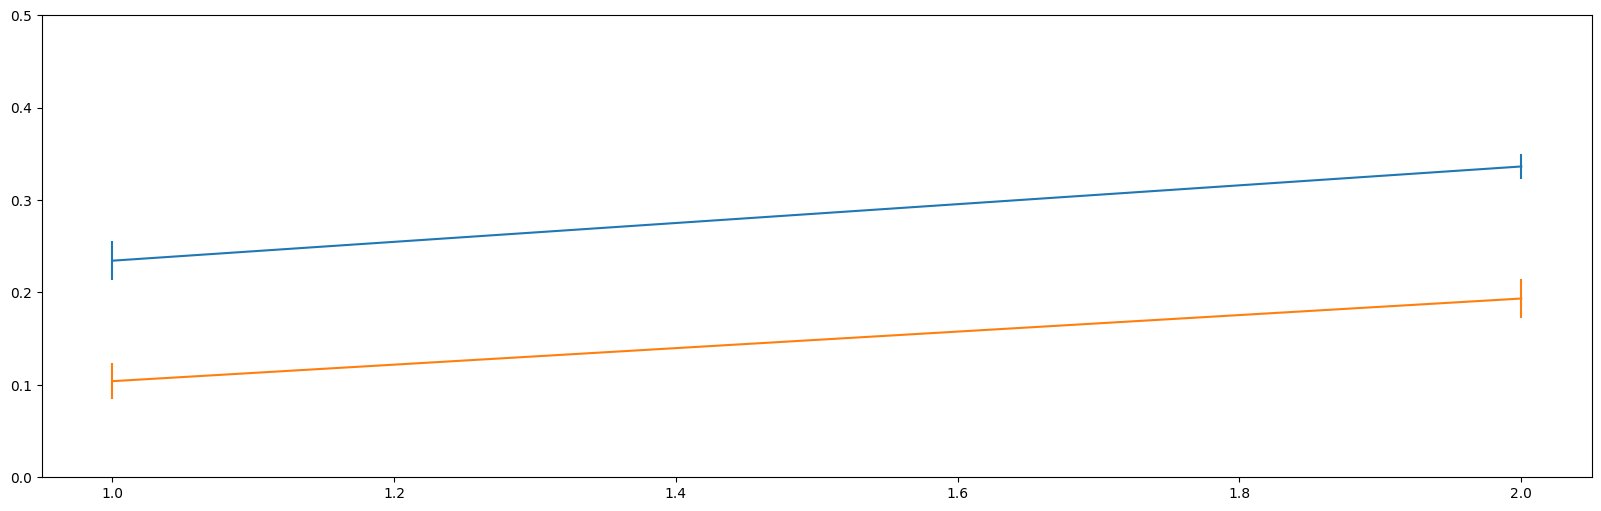

In [40]:
passive = [passive_change['familiar']['theta'][:, 3].mean().detach(), active_change['familiar']['theta'][:, 3].mean().detach()]
active = [passive_change['novel']['theta'][:, 3].mean().detach(), active_change['novel']['theta'][:, 3].mean().detach()]

pstd = [passive_change['familiar']['theta'][:, 3].std().detach(), active_change['familiar']['theta'][:, 3].std().detach()]
astd = [passive_change['novel']['theta'][:, 3].std().detach(), active_change['novel']['theta'][:, 3].std().detach()]

n = (passive_change['familiar']['theta'][:, 3].shape[0] * passive_change['familiar']['theta'][:, 3].shape[-1])**0.5

plt.errorbar([1, 2], passive, np.array(pstd)/8)
plt.errorbar([1, 2], active, np.array(astd)/8)

plt.ylim([0, 0.5])